In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing Dataset
train_data = pd.read_csv('aps_failure_training_set.csv')
test_data = pd.read_csv('aps_failure_test_set.csv')

In [3]:
#Display head  of data 
train_data.head(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [4]:
# Display tail of data 
train_data.tail(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0
59999,neg,40222,na,698,628,0,0,0,0,0,...,440066,183200,344546,254068,225148,158304,170384,158,0,0


In [5]:
# #statistacal describtions of train data
train_data.describe()

,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


In [6]:
#statistacal describtions of test data
test_data.describe()

,aa_000
count,1.600000e+04
mean,6.799698e+04
std,5.035350e+05
min,0.000000e+00
25%,9.280000e+02
50%,3.098200e+04
75%,4.947900e+04
max,4.294967e+07


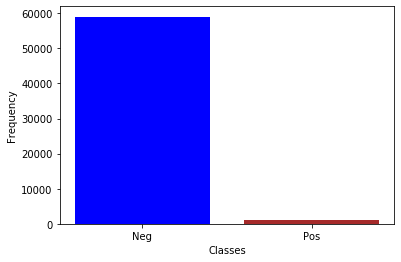

In [7]:
#Displaying the occourance of pos and neg instances train set

train_data['class'] = pd.Categorical(train_data['class']).codes
train_data_oc = np.bincount(train_data['class'].values)
plt.bar(['Neg', 'Pos'],train_data_oc, color =['blue', 'brown'])
plt.xticks(['Neg', 'Pos'])
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

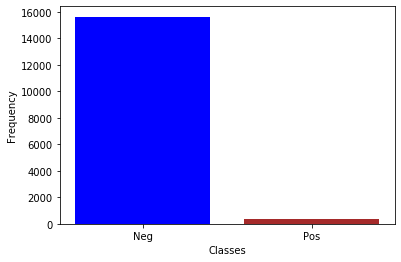

In [8]:
#Displaying the occourance of pos and neg instances Test set
test_data['class'] = pd.Categorical(test_data['class']).codes
train_data_oc = np.bincount(test_data['class'].values)
plt.bar(['Neg', 'Pos'],train_data_oc, color =['blue', 'brown'])
plt.xticks(['Neg', 'Pos'])
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

In [9]:
#replacing na values across the whole columns in train and test dataset
train_data = train_data.iloc[:, 0:171].replace('na','1')
test_data = test_data.iloc[:, 0:171].replace('na','1')

In [10]:
# split train and test Data in  X_train, X_test, y_train and y_test for training the model
y_train = train_data['class'].copy(deep=True)
X_train = train_data.copy(deep=True)
X_train.drop(['class'], inplace=True, axis=1)

y_test = test_data['class'].copy(deep=True)
X_test = test_data.copy(deep=True)
X_test.drop(['class'], inplace=True, axis=1)

In [11]:
# checking structure of our data for training, it can be seen that the 
# class column (dependent variable) has been splited into y_train and y_test
# while (independent variables) are inside X_train and X_test.

print( y_train.shape, X_train.shape)
print( y_test.shape, X_test.shape)

(60000,) (60000, 170)
(16000,) (16000, 170)


In [12]:
print(X_train.dtypes)

aa_000     int64
ab_000    object
ac_000    object
ad_000    object
ae_000    object
af_000    object
ag_000    object
ag_001    object
ag_002    object
ag_003    object
ag_004    object
ag_005    object
ag_006    object
ag_007    object
ag_008    object
ag_009    object
ah_000    object
ai_000    object
aj_000    object
ak_000    object
al_000    object
am_0      object
an_000    object
ao_000    object
ap_000    object
aq_000    object
ar_000    object
as_000    object
at_000    object
au_000    object
           ...  
dl_000    object
dm_000    object
dn_000    object
do_000    object
dp_000    object
dq_000    object
dr_000    object
ds_000    object
dt_000    object
du_000    object
dv_000    object
dx_000    object
dy_000    object
dz_000    object
ea_000    object
eb_000    object
ec_00     object
ed_000    object
ee_000    object
ee_001    object
ee_002    object
ee_003    object
ee_004    object
ee_005    object
ee_006    object
ee_007    object
ee_008    object
ee_009    obje

In [13]:
# converting strings to float
X_train = X_train.astype('float64')
X_test = X_test .astype('float64')
print(X_train.dtypes)

aa_000    float64
ab_000    float64
ac_000    float64
ad_000    float64
ae_000    float64
af_000    float64
ag_000    float64
ag_001    float64
ag_002    float64
ag_003    float64
ag_004    float64
ag_005    float64
ag_006    float64
ag_007    float64
ag_008    float64
ag_009    float64
ah_000    float64
ai_000    float64
aj_000    float64
ak_000    float64
al_000    float64
am_0      float64
an_000    float64
ao_000    float64
ap_000    float64
aq_000    float64
ar_000    float64
as_000    float64
at_000    float64
au_000    float64
           ...   
dl_000    float64
dm_000    float64
dn_000    float64
do_000    float64
dp_000    float64
dq_000    float64
dr_000    float64
ds_000    float64
dt_000    float64
du_000    float64
dv_000    float64
dx_000    float64
dy_000    float64
dz_000    float64
ea_000    float64
eb_000    float64
ec_00     float64
ed_000    float64
ee_000    float64
ee_001    float64
ee_002    float64
ee_003    float64
ee_004    float64
ee_005    float64
ee_006    

In [15]:
#import Random forest classifier library for training and metrics to find its f1 score ad loss between predict and actual values.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, log_loss, confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import scikitplot as skplt

# n_estimator is used to represent the number of trees, larger NO of tree better result but slow training process
rf = RandomForestClassifier(n_estimators=200,n_jobs=-1)
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)

#print(len(y_pred))

if len(y_pred)>0:
    f1 = f1_score(y_test,y_pred,average="weighted")
    print("F1 score: ",f1)

#print(list(y_pred_proba))
#print(list(y_pred))
#print(list(y_pred_proba))

if len(y_pred_proba)>0:
    logloss = log_loss(y_test,y_pred_proba, eps=1e-15, normalize=True, sample_weight=None,)
    print("loss:",logloss)

F1 score:  0.9920120409205623
loss: 0.025157208862515577


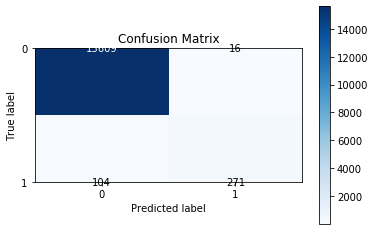

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.94      0.72      0.82       375

    accuracy                           0.99     16000
   macro avg       0.97      0.86      0.91     16000
weighted avg       0.99      0.99      0.99     16000



In [16]:
# displaying the confusion matrix and classification of report on test values
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)
plt.show()
print(classification_report(y_test,y_pred))

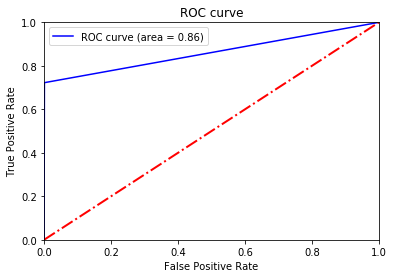

In [17]:
#As accuracy alone is not the suitable quality mesaure, we need to tune the imbalanced data set by using ML metrics 
#(Recall and Precision), this helps us to manipuate the thresholds for optimization, we need to visualize the roc curves 
#to find the possible threhold values
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc = auc(fpr, tpr)
#print(fpr, tpr, thresholds)

plt.plot(fpr, tpr, color = 'blue', label = 'ROC curve (area = %.2f)' % roc_auc)
plt.plot([0,1], [0, 1], color ='red', lw = 2, linestyle='-.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="upper left")
plt.show()

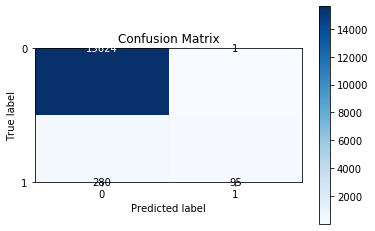

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     15625
           1       0.99      0.25      0.40       375

    accuracy                           0.98     16000
   macro avg       0.99      0.63      0.70     16000
weighted avg       0.98      0.98      0.98     16000



In [18]:
#updating y_pred variable to check impact on confusion matrix
y_test_predictions_rec = y_pred_proba[:,1] > 0.1
y_test_predictions_prec = y_pred_proba[:,1] > 0.86
skplt.metrics.plot_confusion_matrix(y_test, y_test_predictions_prec, normalize=False)
plt.show()
print(classification_report(y_test, y_test_predictions_prec))

campare the two confusion_matrix and classification report above, the manipulation. now based on the this improved confusion matrix,we need to define  a funciton to process probability thresholds.

In [19]:
scores = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, scores)

In [21]:
from tqdm import tqdm

costs = []
best_threshold = 0.5
min_cost = np.inf
for threshold in tqdm(thresholds):
    y_pred_threshold = scores > threshold
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()
    cost = 10*fp + 500*fn
    costs.append(cost)
    if cost < min_cost:
        min_cost = cost
        best_threshold = threshold
print("Best threshold: {:.4f}".format(best_threshold))
print("Min cost: {:.2f}".format(min_cost))

100%|████████████████████████████████████████████████████████████████████████████████| 170/170 [00:05<00:00, 33.62it/s]


Best threshold: 0.0400
Min cost: 9150.00


9150


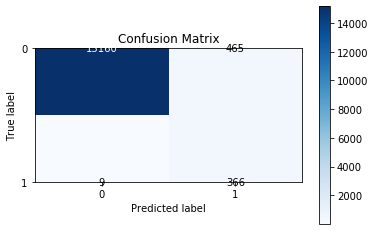

In [22]:
y_pred_test = rf.predict_proba(X_test)[:,1] > best_threshold
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
skplt.metrics.plot_confusion_matrix(y_test,y_pred_test, normalize=False)
print(10*fp + 500*fn)

Using random forest classifier, the thresold is 0.0400 and failure cost prediction is 9150

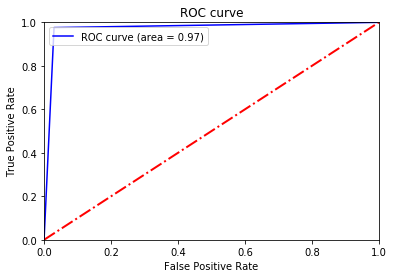

In [23]:
#now display ROC Cuvre for the impact
fpr, tpr, thresholds = roc_curve (y_test, y_pred_test)
roc_auc = auc(fpr, tpr)
#print(fpr, tpr, thresholds)

plt.plot(fpr, tpr, color = 'blue', label = 'ROC curve (area = %.2f)' % roc_auc)
plt.plot([0,1], [0, 1], color ='red', lw = 2, linestyle='-.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="upper left")
plt.show()